In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("new_customer_purchase_dataset.csv")

print("\nFirst 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   Gender  Monthly Income  Brand Awareness  Quality Rating Purchase
0  Female           81238                7               4      YES
1    Male           67692                4               8      YES
2  Female           32960                8               6       NO
3  Female           47218                4               8       NO
4    Male           75271                5               1       NO


In [3]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Purchase'] = df['Purchase'].map({'YES': 1, 'NO': 0})

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


Missing Values:
Gender             0
Monthly Income     0
Brand Awareness    0
Quality Rating     0
Purchase           0
dtype: int64

Basic Statistics:
          Gender  Monthly Income  Brand Awareness  Quality Rating   Purchase
count  99.000000       99.000000        99.000000        99.00000  99.000000
mean    0.525253    63201.656566         5.616162         6.30303   0.575758
std     0.501903    16326.891932         2.418918         2.10662   0.496743
min     0.000000    30874.000000         1.000000         1.00000   0.000000
25%     0.000000    51415.500000         4.000000         5.00000   0.000000
50%     1.000000    64155.000000         6.000000         7.00000   1.000000
75%     1.000000    75392.500000         8.000000         8.00000   1.000000
max     1.000000    89866.000000         9.000000         9.00000   1.000000


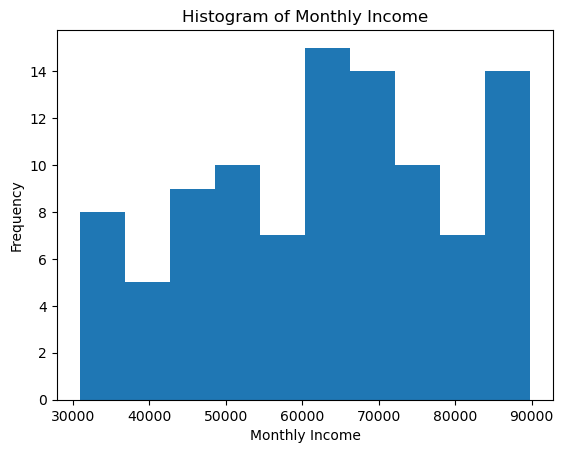

In [4]:
plt.figure()
plt.hist(df['Monthly Income'], bins=10)
plt.title("Histogram of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

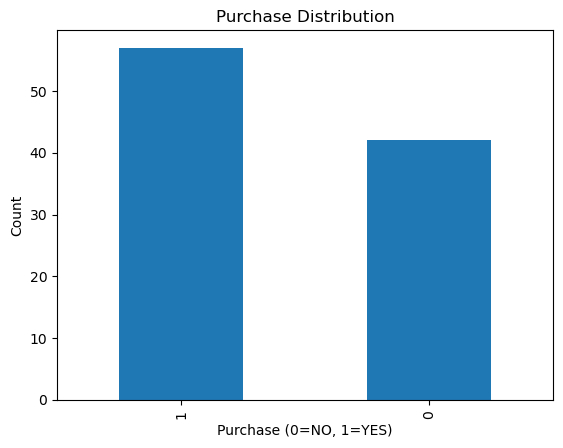

In [5]:
plt.figure()
df['Purchase'].value_counts().plot(kind='bar')
plt.title("Purchase Distribution")
plt.xlabel("Purchase (0=NO, 1=YES)")
plt.ylabel("Count")
plt.show()

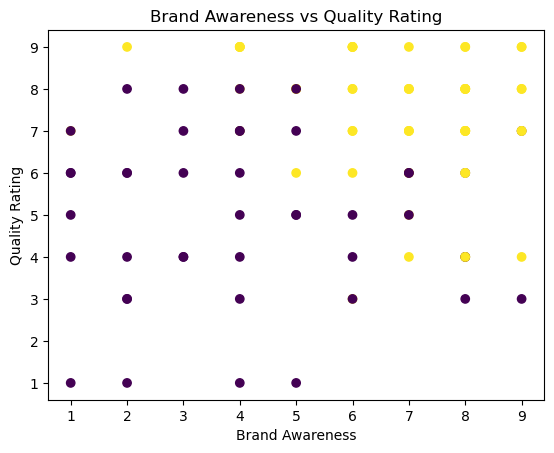

In [6]:
plt.figure()
plt.scatter(
    df['Brand Awareness'],
    df['Quality Rating'],
    c=df['Purchase']
)
plt.title("Brand Awareness vs Quality Rating")
plt.xlabel("Brand Awareness")
plt.ylabel("Quality Rating")
plt.show()

In [7]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [8]:
print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  2]
 [ 3 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.88      0.83      0.86        18

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [9]:
print("\nModel Interpretation:")
print("Positive coefficient → increases chance of purchase")
print("Negative coefficient → decreases chance of purchase")


Model Interpretation:
Positive coefficient → increases chance of purchase
Negative coefficient → decreases chance of purchase


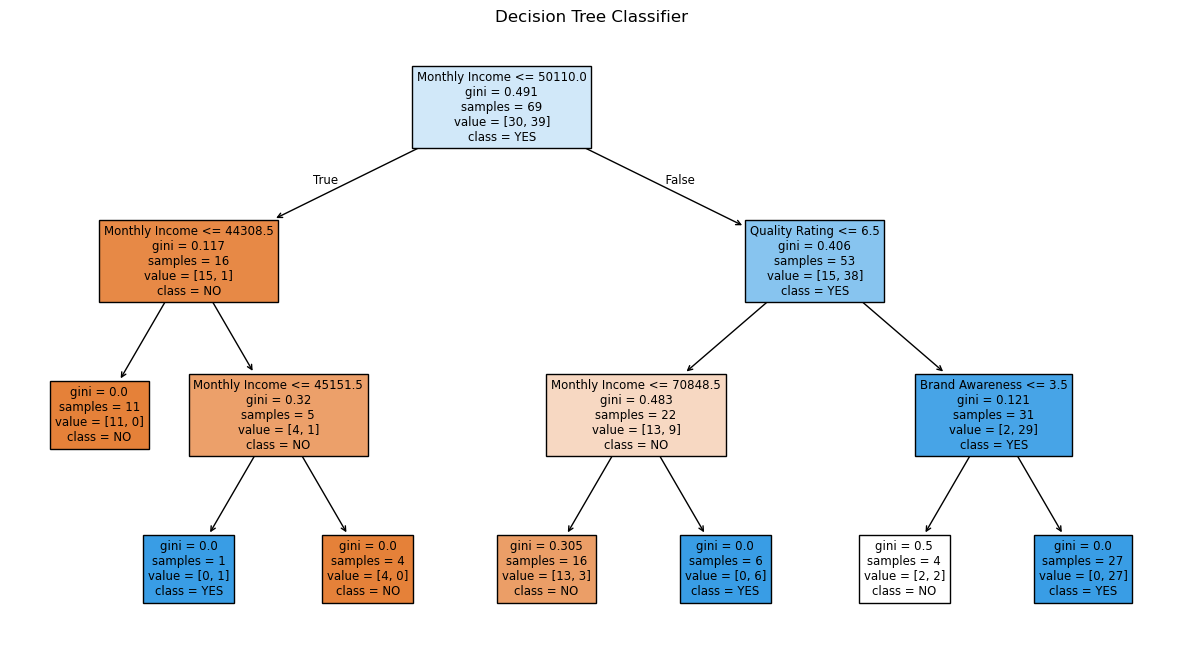

In [10]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

dt_model.fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['NO', 'YES'],
    filled=True
)
plt.title("Decision Tree Classifier")
plt.show()

In [11]:
print("\nDecision Tree Structure:")
print("Root Node: First split feature shown at top")
print("Internal Nodes: Middle decision nodes")
print("Leaf Nodes: Final decision nodes (YES/NO)")


Decision Tree Structure:
Root Node: First split feature shown at top
Internal Nodes: Middle decision nodes
Leaf Nodes: Final decision nodes (YES/NO)


In [12]:
print("\nSample IF–THEN Rules:")
print("IF Brand Awareness <= threshold AND Quality Rating <= threshold THEN Purchase = NO")
print("IF Brand Awareness > threshold AND Monthly Income > threshold THEN Purchase = YES")


Sample IF–THEN Rules:
IF Brand Awareness <= threshold AND Quality Rating <= threshold THEN Purchase = NO
IF Brand Awareness > threshold AND Monthly Income > threshold THEN Purchase = YES
